In [1]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from sympy.parsing.sympy_parser import parse_expr

In [3]:
import numpy as np

import sympy as sym

In [4]:
from importlib.machinery import SourceFileLoader

best_response = SourceFileLoader("best_response", "src/best_response.py").load_module()

In [200]:
epsilon, c  = sym.symbols("epsilon, c")

In [235]:
cvals, evals = (np.linspace(0 + 10 ** (- 3), 1  - 10 ** (- 3), 10).round(3),
                np.linspace(0 + 10 ** (- 3), 0.001, 10).round(3))

In [236]:
with open("ALLD_payoffs.txt") as f:
    file = f.readlines()

In [237]:
labels = [f.split("\t")[0] for f in file]

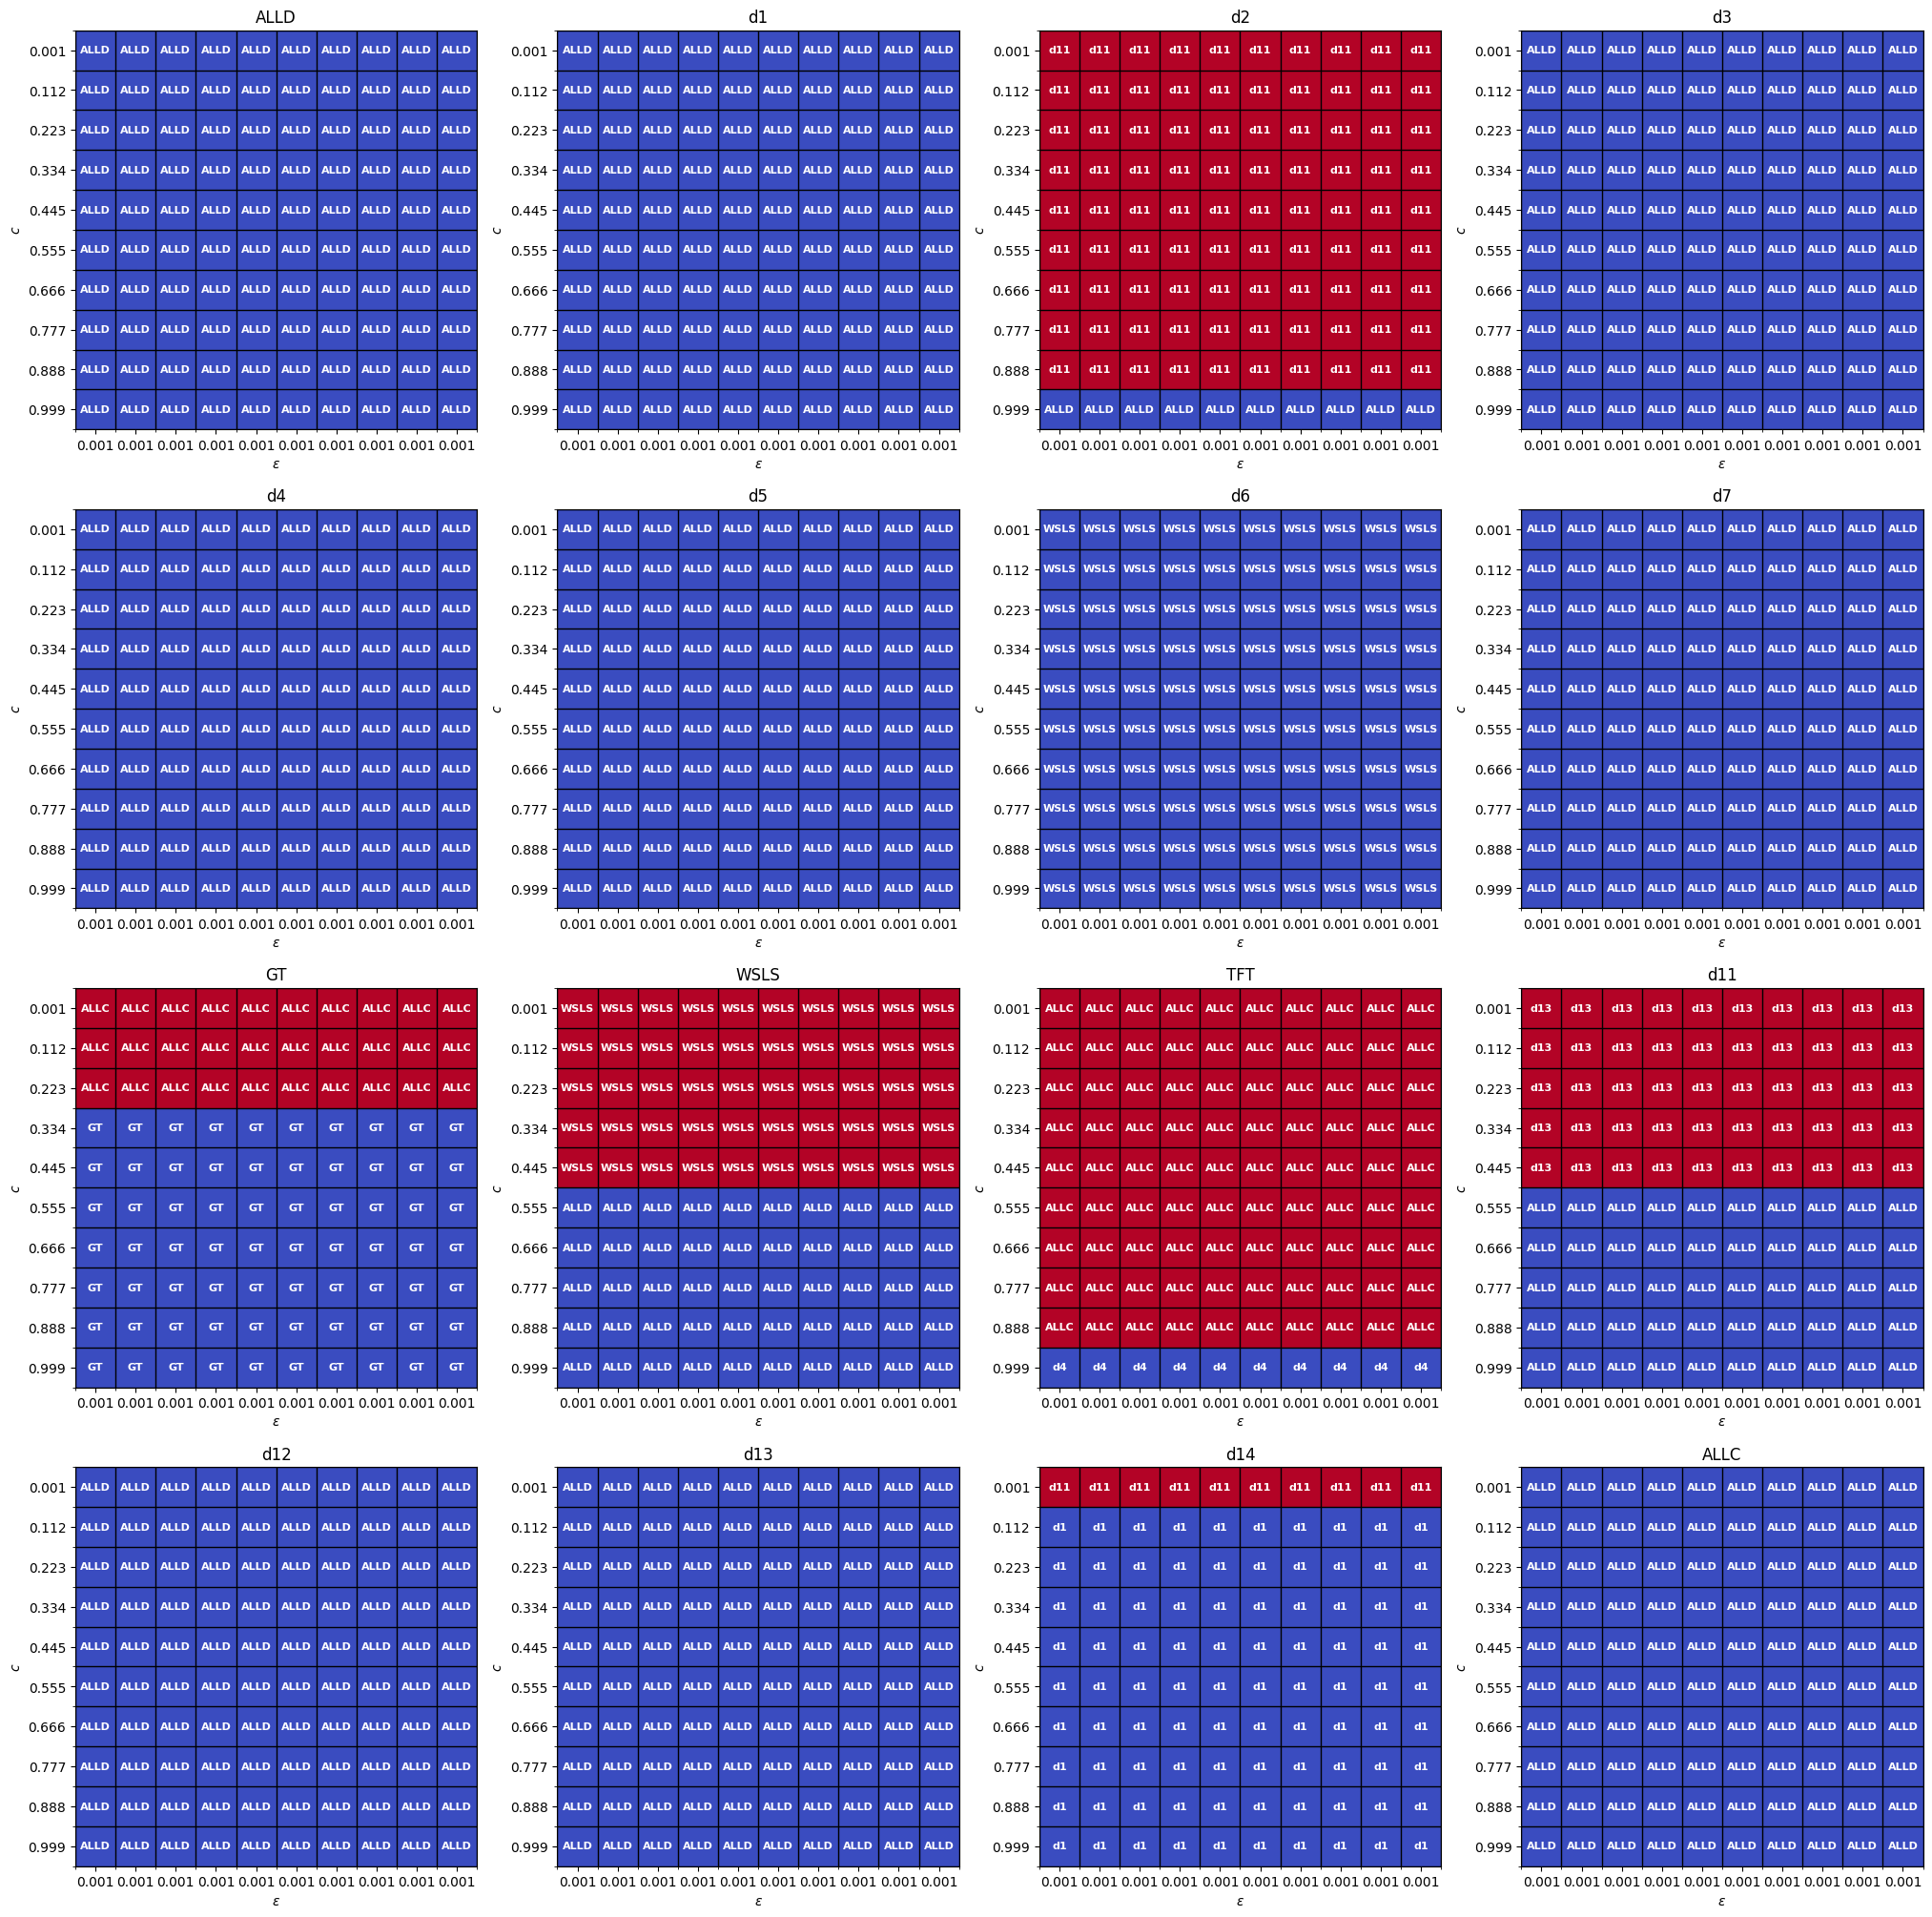

In [238]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))

for l, label in enumerate(labels):

    # Read in file
    with open(f"{label}_payoffs.txt") as f:
        file = f.readlines()
    
    # payoffs expressions
    
    payoffs = [parse_expr(f.split("\t")[1].replace("\n", "")) for f in file]

    expansion = sym.Matrix([sym.series(p, epsilon, 0, 2) for p in payoffs])

    worder = [e.removeO() for e in expansion]
    
    # data
    
    data = np.zeros((10, 10))
    for i, c_val in enumerate(cvals):
        for j, e_val in enumerate(evals):
            data[i, j] = np.argmax([p.subs({epsilon: e_val, c: c_val}) for p in worder])
        
        
    index = (int(l / 4), l % 4)
            
    im = ax[index].imshow(data, origin="upper", aspect="auto", cmap='coolwarm')

    # Major ticks
    ax[index].set_xticks(np.arange(0, 10, 1))
    ax[index].set_yticks(np.arange(0, 10, 1))

    # Labels for major ticks
    ax[index].set_xticklabels(evals)
    ax[index].set_yticklabels(cvals)
    ax[index].set_ylabel("$c$")
    ax[index].set_xlabel("$\epsilon$")

    # Minor ticks
    ax[index].set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, 10, 1), minor=True)

    ax[index].grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    ax[index].set_title(label)

    for (i, j), val in np.ndenumerate(data):
        ax[index].text(j, i, labels[int(val)], ha='center',
                       va='center',
                       color="w", 
                       weight='bold',
                       fontsize=8)

In [213]:
for l, label in enumerate(labels[:1]):

    # Read in file
    with open(f"{label}_payoffs.txt") as f:
        file = f.readlines()
    
    # payoffs expressions
    
    payoffs = [parse_expr(f.split("\t")[1].replace("\n", "")) for f in file]

    expansion = sym.Matrix([sym.series(p, epsilon, 0, 2) for p in payoffs])

    worder = [e.removeO() for e in expansion]

In [251]:
# Read in file
with open(f"ALLD_payoffs.txt") as f:
    file = f.readlines()

# payoffs expressions

payoffs = [parse_expr(f.split("\t")[1].replace("\n", "")) for f in file]

expansion = sym.Matrix([sym.series(p, epsilon, 0, 2) for p in payoffs])

worder = [e.removeO() for e in expansion]

In [254]:
sym.Matrix(worder)

Matrix([
[             epsilon*(1 - c)],
[    -c/2 + epsilon*(c/4 + 1)],
[           epsilon*(1 - 2*c)],
[              -c/2 + epsilon],
[  -c/3 + epsilon*(1 - 2*c/9)],
[      -c + epsilon*(2*c + 1)],
[              -c/2 + epsilon],
[      -c + epsilon*(2*c + 1)],
[             epsilon*(1 - c)],
[              -c/2 + epsilon],
[           epsilon*(1 - 2*c)],
[    -c/2 + epsilon*(1 - c/4)],
[              -c/2 + epsilon],
[        -c + epsilon*(c + 1)],
[-2*c/3 + epsilon*(2*c/9 + 1)],
[        -c + epsilon*(c + 1)]])

In [242]:
sym.solve(worder[0] > worder[1], c)

c*(3 - 5*epsilon)/9 > 1/3 - 17*epsilon/9

In [246]:
(worder[0] - worder[1]).simplify()

-5*c*epsilon/9 + c/3 + 17*epsilon/9 - 1/3

In [249]:
(17 * epsilon + 3 * c + 5 * c * epsilon).simplify()

5*c*epsilon + 3*c + 17*epsilon